In [1]:
import pandas as pd
import numpy as np
import pandas_profiling as pp
import seaborn as sns

In [2]:
df = pd.read_csv('./core/Teams.csv')

In [3]:
df.head()

yearID lgID teamID franchID divID  Rank   G  Ghome   W   L  ...  DP     FP  \
0    1871  NaN    BS1      BNA   NaN     3  31    NaN  20  10  ...  24  0.834   
1    1871  NaN    CH1      CNA   NaN     2  28    NaN  19   9  ...  16  0.829   
2    1871  NaN    CL1      CFC   NaN     8  29    NaN  10  19  ...  15  0.818   
3    1871  NaN    FW1      KEK   NaN     7  19    NaN   7  12  ...   8  0.803   
4    1871  NaN    NY2      NNA   NaN     5  33    NaN  16  17  ...  14  0.840   

                      name                          park  attendance  BPF  \
0     Boston Red Stockings           South End Grounds I         NaN  103   
1  Chicago White Stockings       Union Base-Ball Grounds         NaN  104   
2   Cleveland Forest Citys  National Association Grounds         NaN   96   
3     Fort Wayne Kekiongas                Hamilton Field         NaN  101   
4         New York Mutuals      Union Grounds (Brooklyn)         NaN   90   

   PPF  teamIDBR  teamIDlahman45  teamIDretro  
0   98       BOS             BS1          BS1  
1  102       CHI             CH1          CH1  
2  100       CLE             CL1          CL1  
3  107       KEK             FW1          FW1  
4   88       NYU             NY2          NY2  

[5 rows x 48 columns]

In [4]:
df.shape

(2895, 48)

In [5]:
df.describe()

yearID         Rank            G        Ghome            W  \
count  2895.000000  2895.000000  2895.000000  2496.000000  2895.000000   
mean   1956.963040     4.072539   150.692919    78.556891    74.942314   
std      42.260337     2.308810    22.968790     4.638081    17.530459   
min    1871.000000     1.000000     6.000000    44.000000     0.000000   
25%    1921.000000     2.000000   154.000000    77.000000    66.000000   
50%    1965.000000     4.000000   158.000000    81.000000    77.000000   
75%    1994.000000     6.000000   162.000000    81.000000    87.000000   
max    2018.000000    13.000000   165.000000    84.000000   116.000000   

                 L            R           AB            H           2B  ...  \
count  2895.000000  2895.000000  2895.000000  2895.000000  2895.000000  ...   
mean     74.942314   683.611744  5154.547496  1347.913644   229.140933  ...   
std      17.274056   134.572259   741.546183   216.989317    58.673209  ...   
min       4.000000    24.000000   211.000000    33.000000     1.000000  ...   
25%      66.000000   615.000000  5142.000000  1303.000000   195.000000  ...   
50%      76.000000   691.000000  5404.000000  1393.000000   233.000000  ...   
75%      87.000000   764.000000  5520.500000  1466.000000   272.000000  ...   
max     134.000000  1220.000000  5781.000000  1783.000000   376.000000  ...   

                HA          HRA          BBA          SOA            E  \
count  2895.000000  2895.000000  2895.000000  2895.000000  2895.000000   
mean   1347.686356   103.967530   475.424870   750.522971   184.138860   
std     216.955229    59.625974   130.396145   309.842690   108.208599   
min      49.000000     0.000000     1.000000     0.000000    47.000000   
25%    1290.500000    49.000000   430.000000   506.500000   114.000000   
50%    1392.000000   112.000000   496.000000   754.000000   143.000000   
75%    1470.000000   152.000000   554.000000   985.500000   212.000000   
max    1993.000000   258.000000   827.000000  1687.000000   639.000000   

                DP           FP    attendance          BPF          PPF  
count  2895.000000  2895.000000  2.616000e+03  2895.000000  2895.000000  
mean    133.539551     0.965802  1.380458e+06   100.194128   100.217271  
std      35.302549     0.029347  9.578068e+05     4.919002     4.846016  
min       0.000000     0.761000  6.088000e+03    60.000000    60.000000  
25%     117.000000     0.965000  5.447818e+05    97.000000    97.000000  
50%     141.000000     0.977000  1.185781e+06   100.000000   100.000000  
75%     157.000000     0.981000  2.065338e+06   103.000000   103.000000  
max     217.000000     0.991000  4.483350e+06   129.000000   141.000000  

[8 rows x 35 columns]

In [6]:
df.dtypes

yearID              int64
lgID               object
teamID             object
franchID           object
divID              object
Rank                int64
G                   int64
Ghome             float64
W                   int64
L                   int64
DivWin             object
WCWin              object
LgWin              object
WSWin              object
R                   int64
AB                  int64
H                   int64
2B                  int64
3B                  int64
HR                  int64
BB                float64
SO                float64
SB                float64
CS                float64
HBP               float64
SF                float64
RA                  int64
ER                  int64
ERA               float64
CG                  int64
SHO                 int64
SV                  int64
IPouts              int64
HA                  int64
HRA                 int64
BBA                 int64
SOA                 int64
E                   int64
DP          

In [7]:
df.isnull().sum()

yearID               0
lgID                50
teamID               0
franchID             0
divID             1517
Rank                 0
G                    0
Ghome              399
W                    0
L                    0
DivWin            1545
WCWin             2181
LgWin               28
WSWin              357
R                    0
AB                   0
H                    0
2B                   0
3B                   0
HR                   0
BB                   1
SO                  16
SB                 126
CS                 832
HBP               1158
SF                1541
RA                   0
ER                   0
ERA                  0
CG                   0
SHO                  0
SV                   0
IPouts               0
HA                   0
HRA                  0
BBA                  0
SOA                  0
E                    0
DP                   0
FP                   0
name                 0
park                34
attendance         279
BPF        

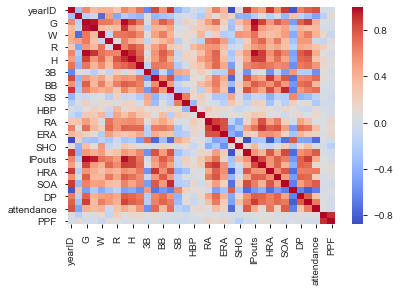

In [8]:
sns.heatmap(df.corr(), cmap='coolwarm')

In [9]:
df._get_numeric_data().head()

yearID  Rank   G  Ghome   W   L    R    AB    H  2B  ...   HA  HRA  BBA  \
0    1871     3  31    NaN  20  10  401  1372  426  70  ...  367    2   42   
1    1871     2  28    NaN  19   9  302  1196  323  52  ...  308    6   28   
2    1871     8  29    NaN  10  19  249  1186  328  35  ...  346   13   53   
3    1871     7  19    NaN   7  12  137   746  178  19  ...  261    5   21   
4    1871     5  33    NaN  16  17  302  1404  403  43  ...  373    7   42   

   SOA    E  DP     FP  attendance  BPF  PPF  
0   23  243  24  0.834         NaN  103   98  
1   22  229  16  0.829         NaN  104  102  
2   34  234  15  0.818         NaN   96  100  
3   17  163   8  0.803         NaN  101  107  
4   22  235  14  0.840         NaN   90   88  

[5 rows x 35 columns]

In [10]:
pp.ProfileReport(df)